「# -*- coding: utf-8 -*-」は文字コード指定のコマンド．  
「numpy」(配列演算)の準備．  
「matplotlib」(グラフ描画)の準備．  
「%matplotlib inline」でグラフをnotebook内に描画．

In [10]:
# -*- coding: utf-8 -*-

from numpy import * 
import matplotlib.pyplot as plt

%matplotlib inline

コインの定義：

$
C=
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$

a,b,c,dに複素数を設定する場合は，例えば
$
a = ２．＋３．ｊ
$
のように指定する．  

原点に置く初期状態の定義  
$
\psi_0 = | 0 \rangle \otimes (\alpha | L \rangle + \beta | R \rangle )\quad \text{with }|\alpha |^{2}+|\beta |^{2} = 1.
$

In [11]:
a = 1./sqrt(2.)
b = 1./sqrt(2.)
c = 1./sqrt(2.)
d = -1./sqrt(2.)

C = array( [ [a, b], [c, d] ])

alpha = 1/sqrt(2.)
beta =  1j/sqrt(2.)

T：総試行時間 

In [12]:
T = 300     # number of trials

以下，計算プログラム．

In [13]:
P = 2*T+1    # number of positions

ShiftPlus = roll(identity(P), 1, axis=0) # shift to +1 direction
ShiftMinus = roll(identity(P), -1, axis=0) # shift to -1 direction

L = array([1, 0])  # |L>
R = array([0, 1])  # |R>

LL = outer(L, L)  # |L><L| 
RR = outer(R, R)  # |R><R| 

S = kron(ShiftPlus, RR) + kron(ShiftMinus, LL) # S| i, R > = | i+1, R>, S| i, L> = | i-1, L>

U = S.dot(kron(identity(P), C)) # U = S \sum_{i} | i >< i | \otimes C

p0 = zeros(P)
p0[int((P-1)/2)] = 1     # origin =1, others =0

psi0 = kron(p0,alpha*L+beta*R) # \psi _{0}

UTpsi0 = linalg.matrix_power(U, T).dot(psi0) # U^{T} \psi _{0}

prob = empty(P)

prob = abs(UTpsi0[0::2])**2 + abs(UTpsi0[1::2])**2  # (U^{T} \psi _{0})(2i) = | i-T, L>, (U^{T} \psi _{0})(2i+1) = | i-T, R>

確率分布の描画

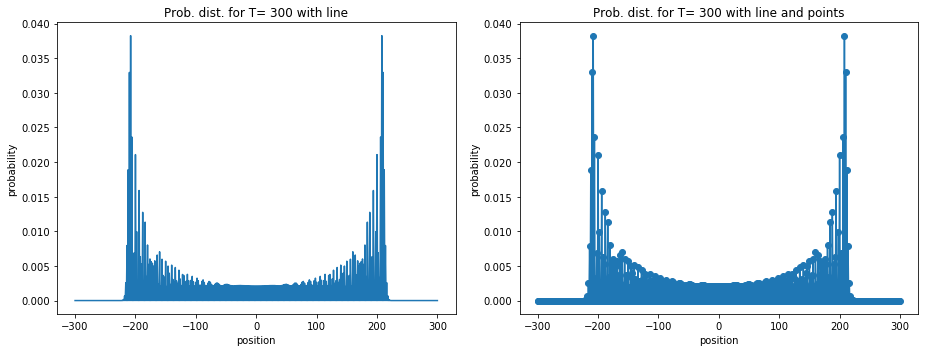

In [18]:
plt.figure( figsize = (13,5) ) # set plot size

plt.subplot(1,2,1) # rows = 1, columns = 2, plot no. =1
plt.plot(arange(-T,T+1,1), prob) # plot with line
plt.title('Prob. dist. for T= %s with line' % T) # title of the graph
plt.xlabel('position') # x label of the graph
plt.ylabel('probability') # y label of the graph

plt.subplot(1,2,2) # rows = 1, columns = 2, plot no. =2
plt.plot(arange(-T,T+1,1), prob, 'o-')  # plot with line and points
plt.title('Prob. dist. for T= %s with line and points' % T) # title of the graph
plt.xlabel('position') # x label of the graph
plt.ylabel('probability') # y label of the graph

plt.tight_layout() # adjust spaces between subplots